In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./dataset-0510"]).decode("utf8"))

fields.pdf
submit_test.csv
test.csv
train.csv



In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [157]:
train_data = pd.read_csv('./dataset-0510/train.csv')

In [158]:
def show_missing(houseprice):
    missing = houseprice.columns[houseprice.isnull().any()].tolist()
    return missing

def cat_exploration(houseprice, column):
    print(houseprice[column].value_counts())

def cat_imputation(houseprice, column, value):
    houseprice.loc[houseprice[column].isnull(), column] = value

In [159]:
train_data
# feature 235 rows data number is 6k

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05
5,HmW2MkrwafmceWAH,8,21,18394,5,1,2,6576,2,NaN,...,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05
6,ITYyim3zx6DQyCoF,8,7,20474,15,0,2,16559,0,NaN,...,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06
7,KFrxqaWZaLynrOae,8,12,18185,8,3,2,11934,1,NaN,...,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06
8,ZiK0gY7A0BvwZ8OV,8,21,18794,5,1,2,7640,2,NaN,...,116,1,203,1,2666,1,7014,1,40.349486,9.870214e+05
9,QnytA7FbgaVxIDuP,8,7,19927,10,3,2,9863,0,NaN,...,118,1,288,1,12945,1,32664,1,102.955013,1.181540e+07


In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


In [161]:
train_data['total_price'].describe()

count    6.000000e+04
mean     1.293727e+07
std      5.522463e+07
min      2.261495e+05
25%      2.433114e+06
50%      5.240482e+06
75%      1.123932e+07
max      5.088279e+09
Name: total_price, dtype: float64

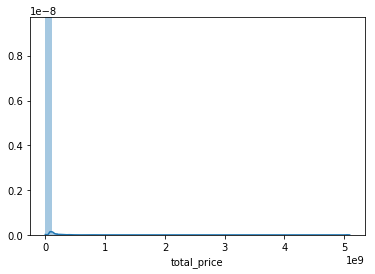

In [162]:
sns.distplot(train_data['total_price'])

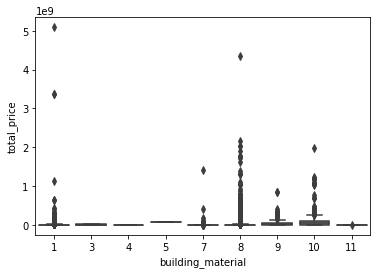

In [163]:
var = 'building_material'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

In [164]:
train_data['parking_way'].describe()


count    60000.000000
mean         1.585700
std          0.778952
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: parking_way, dtype: float64

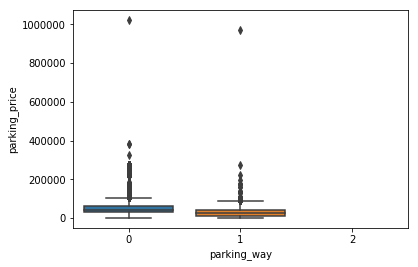

In [165]:
var = 'parking_way'
data = pd.concat([train_data['parking_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="parking_price", data=data)


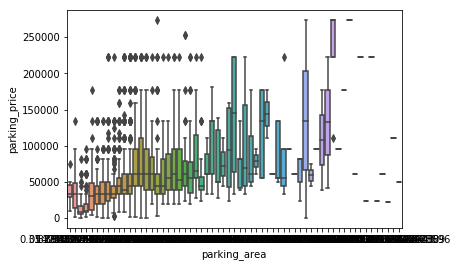

In [166]:
var = 'parking_area'
data = pd.concat([train_data['parking_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="parking_price", data=data)

## Look like parking area and price in direct proportion. 

## It seems that a large area does not absolutely affect the price.

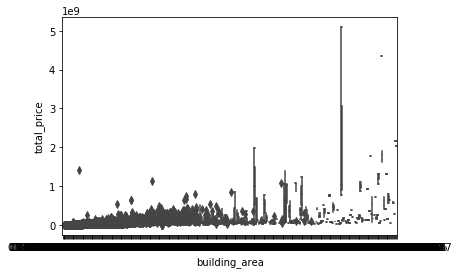

In [167]:
var = 'building_area'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

## As same as building area

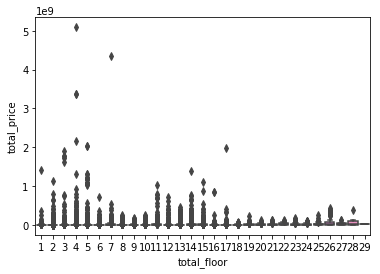

In [168]:
var = 'total_floor'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

count    58858.000000
mean       674.840175
std        140.653083
min        411.000000
25%        583.000000
50%        642.000000
75%        729.000000
max       1851.000000
Name: village_income_median, dtype: float64


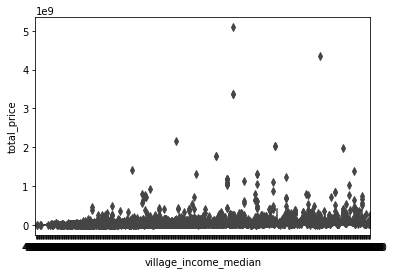

In [169]:
var = 'village_income_median'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

## Look like village income median and price in direct proportion. 

count     60000.000000
mean     231270.304117
std      128148.636175
min        5478.000000
25%      139259.000000
50%      201309.000000
75%      302089.000000
max      551480.000000
Name: town_population, dtype: float64


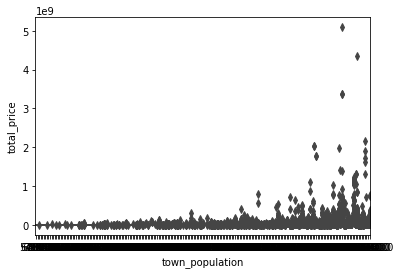

In [170]:
var = 'town_population'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

count     60000.000000
mean     231270.304117
std      128148.636175
min        5478.000000
25%      139259.000000
50%      201309.000000
75%      302089.000000
max      551480.000000
Name: town_population, dtype: float64


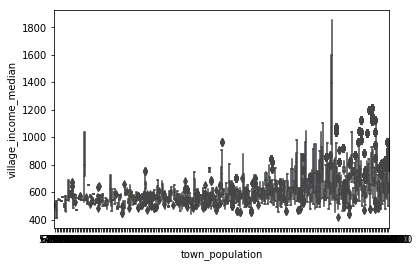

In [171]:
var = 'town_population'
print(train_data[var].describe())
data = pd.concat([train_data['village_income_median'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="village_income_median", data=data)
#fig.axis(ymin=1411, ymax=5.088279e+11);

count    60000.000000
mean     11293.218933
std       9449.202082
min         49.000000
25%       2798.000000
50%       8054.000000
75%      20532.000000
max      38956.000000
Name: town_population_density, dtype: float64


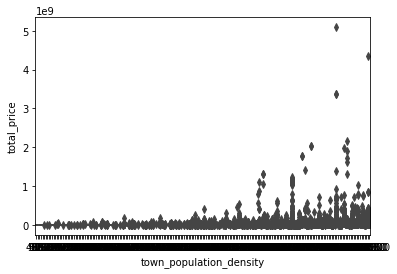

In [172]:
var = 'town_population_density'
print(train_data[var].describe())
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

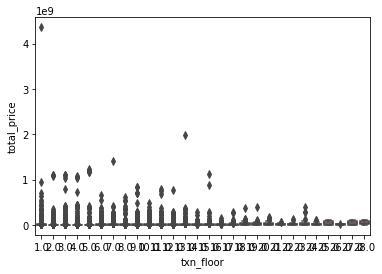

In [173]:
var = 'txn_floor'
data = pd.concat([train_data['total_price'], train_data[var]], axis=1)
fig = sns.boxplot(x=var, y="total_price", data=data)
#fig.axis(ymin=2.261495e+07, ymax=5.088279e+11);

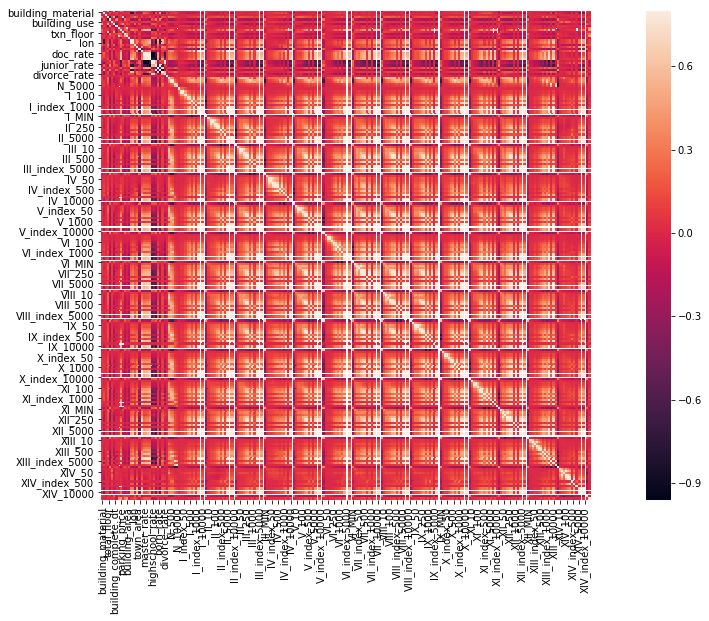

In [174]:
# corr
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

# Constructing model

In [335]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
train_data = pd.read_csv('./dataset-0510/train.csv')

In [336]:
train_data = train_data.drop(['building_id', 'parking_area', 'parking_price'], axis=1)

In [337]:
count = train_data.isnull().sum()
count

building_material              0
city                           0
txn_dt                         0
total_floor                    0
building_type                  0
building_use                   0
building_complete_dt           0
parking_way                    0
txn_floor                  15902
land_area                      0
building_area                  0
town                           0
lat                            0
lon                            0
village_income_median       1142
town_population                0
town_area                      0
town_population_density        0
doc_rate                       0
master_rate                    0
bachelor_rate                  0
jobschool_rate                 0
highschool_rate                0
junior_rate                    0
elementary_rate                0
born_rate                      0
death_rate                     0
marriage_rate                  0
divorce_rate                   0
village                        0
          

In [338]:
corrmat = train_data.corr()
#f, ax = plt.subplots(figsize=(20, 9))
#sns.heatmap(corrmat, annot= True)

In [339]:
print("Find most important features relative to target")
corrmat.sort_values(['total_price'], ascending=False, inplace=True)
corr_price = corrmat.total_price
print(corr_price)

Find most important features relative to target
total_price              1.000000
building_area            0.459167
land_area                0.313409
master_rate              0.168603
bachelor_rate            0.168585
doc_rate                 0.165599
XIII_5000                0.161861
jobschool_rate           0.150532
village_income_median    0.145541
VII_5000                 0.140251
V_5000                   0.136286
VII_1000                 0.135433
V_1000                   0.135189
XIII_10000               0.134800
IX_5000                  0.133290
VII_10000                0.133018
XI_10000                 0.131184
V_500                    0.130854
VI_10000                 0.130448
IX_1000                  0.129597
IX_10000                 0.129468
V_10000                  0.128324
VII_500                  0.127891
VIII_5000                0.126393
VIII_10000               0.124815
III_10000                0.124746
VI_5000                  0.124249
X_10000                  0.123970


In [340]:
#train_data= train_data.drop([
#    'I_index_5000', 'I_index_10000', 'II_index_5000', 'II_index_10000', 'III_index_5000',
#    'II_index_10000', 'III_index_5000', 'IV_index_10000', 'V_index_5000', 'VI_index_5000',
#    'III_index_10000'
#], axis=1)
def drop_low_corr(data, threshold=0.03):
    corrmat = data.corr().total_price
    high_corr_cols = []
    i = 0
    for value in corrmat:
        if value >= 0.012 :
            high_corr_cols.append(data.columns[i])
        i+=1
   
    
    high_corr_cols.remove('total_price')
    return high_corr_cols

high_corr_cols = drop_low_corr(train_data)
train_data2 = train_data[high_corr_cols]
train_data2.shape
print(train_data2.isnull().sum())

building_material              0
total_floor                    0
building_use                   0
building_complete_dt           0
txn_floor                  15902
land_area                      0
building_area                  0
lat                            0
lon                            0
village_income_median       1142
town_population                0
town_population_density        0
doc_rate                       0
master_rate                    0
bachelor_rate                  0
jobschool_rate                 0
born_rate                      0
marriage_rate                  0
N_50                           0
N_500                          0
N_1000                         0
N_5000                         0
N_10000                        0
I_250                          0
I_500                          0
I_index_500                    0
I_1000                         0
I_5000                         0
I_10000                        0
II_10                          0
          

In [342]:
train_data2 = train_data2.drop(['txn_floor', 'village_income_median'], axis=1)

txn_floor = train_data['txn_floor'].fillna(5.389269)
village_income_median = train_data['village_income_median'].fillna(674.840175)
x = pd.concat( [train_data2, txn_floor, village_income_median] ,axis=1)
x

,building_material,total_floor,building_use,building_complete_dt,land_area,building_area,lat,lon,town_population,town_population_density,...,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIV_10,XIV_10000,XIV_MIN,txn_floor,village_income_median
0,8,4,2,6271,18.144460,3.418175,-39.14,117.08,24219.0,17103.0,...,1,147,1,295,1,0,6011,34.469803,3.000000,572.000000
1,8,5,2,7885,11.387227,4.041309,-37.66,119.28,551480.0,23835.0,...,1,661,1,1525,1,0,32221,40.073573,5.000000,550.000000
2,8,4,2,6028,21.426802,5.584279,-37.67,119.29,551480.0,23835.0,...,1,680,1,1606,1,0,32228,54.462081,1.000000,625.000000
3,8,24,2,18325,11.387227,13.563031,-39.13,117.09,139259.0,9440.0,...,0,192,1,312,1,0,7271,99.628966,13.000000,950.000000
4,1,2,2,6880,61.306524,4.688108,-39.24,117.19,112397.0,1582.0,...,0,12,1,88,1,0,7442,124.131236,5.389269,536.000000
5,8,5,2,6576,14.803422,3.623131,-39.14,117.09,343243.0,17347.0,...,1,198,1,306,1,0,7417,61.109908,4.000000,561.000000
6,8,15,2,16559,11.387227,7.726227,-37.69,119.27,238067.0,8054.0,...,1,346,1,1298,1,0,26867,196.690224,8.000000,716.000000
7,8,8,2,11934,11.387227,7.974018,-38.05,118.17,125067.0,18365.0,...,1,95,1,144,1,0,19514,66.780308,4.000000,618.000000
8,8,5,2,7640,13.106100,4.041309,-39.19,117.08,189839.0,9928.0,...,1,97,1,281,1,0,7014,40.349486,1.000000,513.000000
9,8,10,2,9863,11.387227,7.480303,-37.67,119.32,551480.0,23835.0,...,1,579,1,2267,1,0,32664,102.955013,2.000000,604.000000


## Normalized

In [343]:
y = train_data['total_price'].values
standardScaler = preprocessing.StandardScaler()

x_scaled = standardScaler.fit_transform(x)
y_scaled = standardScaler.fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [344]:
#y = train_data['total_price'].values
#X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [359]:
def model_grade(x, y):
    clfs = {
            'RandomForestRegressor':RandomForestRegressor(n_estimators=100),
            'LinearRegressor': linear_model.LinearRegression(),
            'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, max_depth=4)
           }
    X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)
    for clf in clfs:
        try:
            clfs[clf].fit(X_train, y_train)
            y_pred = clfs[clf].predict(X_test)
            print(clf + " cost:" + np.sum(y_pred-y_test)/len(y_pred))
            print('Accuracy -->', clf.score(X_test, y_test)*100)
        except Exception as e:
            print(clf + " Error:")
            print(str(e))
model_grade(x, y)

/home/islab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor cost:-16.82270705595859
RandomForestRegressor Error:
'str' object has no attribute 'score'
LinearRegressor cost:-0.007406560985228393
LinearRegressor Error:
'str' object has no attribute 'score'


/home/islab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor cost:11.803544634940224
GradientBoostingRegressor Error:
'str' object has no attribute 'score'


In [361]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/islab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [362]:
score_pred = standardScaler.inverse_transform(y_pred)


score_test = standardScaler.inverse_transform(y_test)

print('prediction value', score_pred[1])
print("Real value ", score_test[1])

print('Accuracy -->', clf.score(X_test, y_test)*100)

prediction value 4322388.928834112
Real value  [3900503.83549043]
Accuracy --> 66.53602208070035


# Test data

In [382]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 之前训练的模型
rfr = clf

In [383]:
data_test = pd.read_csv('./dataset-0510/test.csv')
data_test

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,NaN,...,7,21,1,129,1,3991,1,8409,1,105.462231
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,NaN,...,18,44,1,67,1,1950,1,10725,1,100.819809
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,NaN,...,0,3,1,35,1,3707,1,19459,1,259.800543
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,NaN,...,16,60,1,144,1,6487,1,29400,1,22.941906
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,NaN,...,4,18,1,76,1,1346,1,3280,1,181.213095
5,EtBjGAHmHCe9t7TZ,8,12,18632,4,4,2,15464,2,NaN,...,7,19,1,88,1,2144,1,5477,1,206.701060
6,hPNH34vmaZtvBtqc,8,7,19144,14,0,2,16590,0,NaN,...,17,64,1,380,1,9419,1,23499,1,77.249329
7,wXjeI38bYDMJJwZC,8,13,19452,5,1,2,7124,2,NaN,...,3,22,1,273,1,2729,1,12880,1,155.031982
8,fxZSGX6aPAFKU8W4,1,17,19045,2,4,2,12634,2,NaN,...,2,11,1,27,1,459,1,1693,1,81.407991
9,ewr0Fx6ign87OwaV,8,7,19220,13,2,10,17351,2,NaN,...,4,17,1,127,1,5742,1,23399,1,16.357214


In [384]:
data_test.isnull().sum()

building_id                   0
building_material             0
city                          0
txn_dt                        0
total_floor                   0
building_type                 0
building_use                  0
building_complete_dt          0
parking_way                   0
parking_area               9500
parking_price              7710
txn_floor                  2639
land_area                     0
building_area                 0
town                          0
lat                           0
lon                           0
village_income_median       184
town_population               0
town_area                     0
town_population_density       0
doc_rate                      0
master_rate                   0
bachelor_rate                 0
jobschool_rate                0
highschool_rate               0
junior_rate                   0
elementary_rate               0
born_rate                     0
death_rate                    0
                           ... 
XII_inde

In [385]:
data_test['txn_floor'].describe()

count    7361.000000
mean        5.421682
std         3.954859
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        27.000000
Name: txn_floor, dtype: float64

In [386]:
data_test['village_income_median'].describe()

count    9816.000000
mean      673.334760
std       139.364209
min       442.000000
25%       582.000000
50%       641.000000
75%       728.000000
max      1851.000000
Name: village_income_median, dtype: float64

In [395]:
txn_floor_test = data_test['txn_floor'].fillna(5.421682)
village_income_median_test = data_test['village_income_median'].fillna(673.334760)

data_test2 = data_test[high_corr_cols]
data_test2 = data_test2.drop(['txn_floor', 'village_income_median'], axis=1)

data_test_x = pd.concat( [data_test2, txn_floor_test, village_income_median_test] ,axis=1)
#data_test_x.isnull().sum()
data_test_x

,building_material,total_floor,building_use,building_complete_dt,land_area,building_area,lat,lon,town_population,town_population_density,...,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIV_10,XIV_10000,XIV_MIN,txn_floor,village_income_median
0,1,2,2,1857,40.317789,3.418175,-37.72,119.45,122155.0,5593.0,...,1,501,1,1502,1,0,8409,105.462231,5.421682,714.00000
1,8,10,2,16011,18.144460,7.726227,-37.70,119.17,114926.0,600.0,...,1,28,1,298,1,0,10725,100.819809,2.000000,583.00000
2,8,4,10,18294,47.912742,12.170581,-38.03,118.24,274819.0,4383.0,...,0,21,1,146,1,0,19459,259.800543,5.421682,641.00000
3,10,19,0,17837,2.222000,2.252256,-37.70,119.34,222585.0,38956.0,...,1,715,1,2499,1,0,29400,22.941906,16.000000,653.00000
4,8,13,2,13272,11.387227,5.813985,-37.74,119.59,38708.0,1696.0,...,1,54,1,87,1,0,3280,181.213095,3.000000,624.00000
5,8,4,2,15464,37.242047,11.623768,-37.86,118.14,86420.0,1347.0,...,1,6,1,17,1,0,5477,206.701060,5.421682,607.00000
6,8,14,2,16590,13.106100,8.475077,-37.63,119.36,387484.0,23747.0,...,1,520,1,2186,1,0,23499,77.249329,11.000000,641.00000
7,8,5,2,7124,14.803422,3.830869,-37.73,119.36,274424.0,8709.0,...,1,457,1,1820,1,0,12880,155.031982,3.000000,803.00000
8,1,2,2,12634,64.242549,10.283420,-37.67,118.52,36750.0,485.0,...,1,2,1,10,1,0,1693,81.407991,5.421682,547.00000
9,8,13,10,17351,4.181031,2.438421,-37.72,119.32,413590.0,20532.0,...,1,526,1,1987,1,0,23399,16.357214,10.000000,661.00000


In [396]:
x = data_test_x.values
y_test_pred = rfr.predict(x)

In [397]:
origin_y_test_pred = standardScaler.inverse_transform(y_test_pred)
print(origin_y_test_pred.shape)

(10000,)


#  Prepare to submit

In [403]:
prediction = pd.DataFrame(origin_y_test_pred, columns=['total_price'])
x_submit = pd.read_csv('./dataset-0510/submit_test.csv')
result = pd.concat([x_submit['building_id'], prediction], axis=1)
result

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [402]:
result.to_csv('./Predictions4.csv', index=False)